In [4]:
!pip install torch torchvision
!pip install tensorboard

  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached grpcio-1.44.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)


In [5]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [6]:
import torchvision
import torch

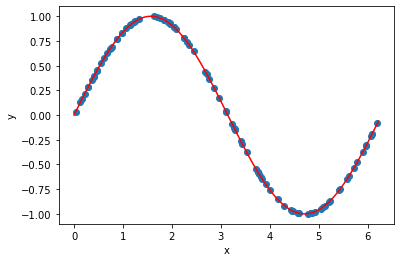

In [34]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = 2 * np.pi * np.random.random((100,1))
y = np.sin(x)

plt.plot(x, y,'o')
plt.xlabel('x')
plt.ylabel('y')

x_all = np.arange(0,2*np.pi, 2*np.pi/100).reshape(-1,1)
plt.plot(x_all, np.sin(x_all), 'r')

In [35]:
import torch.nn as nn
import torch.nn.functional as F

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1,100)
        self.fc2 = nn.Linear(100,50)
        self.fc3 = nn.Linear(50,1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = MyNet()
print(model)

MyNet(
  (fc1): Linear(in_features=1, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


In [48]:
writer.add_graph?

Signature: writer.add_graph(model, input_to_model=None, verbose=False)
Docstring:
Add graph data to summary.

Args:
    model (torch.nn.Module): Model to draw.
    input_to_model (torch.Tensor or list of torch.Tensor): A variable or a tuple of
        variables to be fed.
    verbose (bool): Whether to print graph structure in console.
File:      /opt/conda/lib/python3.6/site-packages/torch/utils/tensorboard/writer.py
Type:      method


In [6]:
# def check(global_step):
#     for _ in range(10):
#         global_step+=1
#         print(global_step)
#     lst= [1,2,3]
#     print(global_step) # 600
#     return lst , global_step
# def check1():
#     global_step=0
#     for _ in range(5):
# #         print(global_step)
#         lst, global_step = check(global_step)
        
# check1()

In [37]:
import torch
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
writer.add_graph(model, torch.from_numpy(x).float())
writer.close()

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert to Tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

model = MyNet()

# Set Hyperparameters, loss function, and optimizer
lr = 1e-1
n_epochs = 4000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

In [39]:
for epoch in range(n_epochs):
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch%100 == 0):
        print('Epoch: {} Loss: {}'.format(epoch, loss.item()))

Epoch: 0 Loss: 0.7513912916183472
Epoch: 100 Loss: 0.14184452593326569
Epoch: 200 Loss: 0.107558973133564
Epoch: 300 Loss: 0.08618123829364777
Epoch: 400 Loss: 0.0680684968829155
Epoch: 500 Loss: 0.05225613713264465
Epoch: 600 Loss: 0.04115648567676544
Epoch: 700 Loss: 0.04602091386914253
Epoch: 800 Loss: 0.03941364213824272
Epoch: 900 Loss: 0.03546077385544777
Epoch: 1000 Loss: 0.03286180645227432
Epoch: 1100 Loss: 0.029712388291954994
Epoch: 1200 Loss: 0.03031614050269127
Epoch: 1300 Loss: 0.03329243138432503
Epoch: 1400 Loss: 0.029925575479865074
Epoch: 1500 Loss: 0.02987964078783989
Epoch: 1600 Loss: 0.032036423683166504
Epoch: 1700 Loss: 0.03193345665931702
Epoch: 1800 Loss: 0.03085366077721119
Epoch: 1900 Loss: 0.030400682240724564
Epoch: 2000 Loss: 0.030865974724292755
Epoch: 2100 Loss: 0.031106319278478622
Epoch: 2200 Loss: 0.030376041308045387
Epoch: 2300 Loss: 0.02986770123243332
Epoch: 2400 Loss: 0.029850199818611145
Epoch: 2500 Loss: 0.029815467074513435
Epoch: 2600 Loss: 0

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert to Tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

model = MyNet()

# Set Hyperparameters, loss function, and optimizer
lr = 1e-1
n_epochs = 4000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

In [41]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
# Training Loop
for epoch in range(n_epochs):
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
    if (epoch%100 == 0):
        writer.add_scalar('Loss', loss.item(), epoch)

writer.close()

In [42]:
writer = SummaryWriter()

x_sort = np.sort(x, axis=None).reshape(-1,1)

for epoch in range(n_epochs):
    
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
    if (epoch%100 == 0):
        writer.add_scalar('MSE Loss', loss.item(), epoch)
    
    # Write y_pred and compare to truth
        y_pred_sort = model(torch.from_numpy(x_sort).float())
        fig, ax = plt.subplots()
        ax.plot(x_sort, y_pred_sort.detach())
        ax.plot(x_sort, np.sin(x_sort))
        writer.add_figure('y_pred', fig, epoch, close=True)
        plt.close(fig)

writer.add_graph(model, x_tensor)
writer.add_hparams({'lr': lr}, {'loss':loss.item()})
 
print(loss.item())
writer.close()

0.5052874088287354


In [43]:
writer = SummaryWriter()

x_test = np.arange(0,2*np.pi,2*np.pi/100).reshape(-1,1)
y_test = np.sin(x_test)

for epoch in range(n_epochs):
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
    if (epoch%100 == 0):
    # Compute y_pred and compare to truth, y_test
        y_pred2 = model(torch.from_numpy(x_test).float())

        fig, ax = plt.subplots()
        ax.plot(x_test, y_test, 'b')
        ax.plot(x_test, y_pred2.detach(), 'r')
        ax.legend(('Truth', 'Pred'))
        writer.add_figure('y_pred', fig, epoch, close=True)
        plt.close(fig)

writer.close()

In [44]:
writer = SummaryWriter()

x_test = np.arange(0,2*np.pi,2*np.pi/100).reshape(-1,1)
y_test = np.sin(x_test)

for epoch in range(n_epochs):
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
    if (epoch%100 == 0):
        writer.add_histogram('fc1/weights', model.fc1.weight, epoch)
        writer.add_histogram('fc2/biases', model.fc2.bias, epoch)

writer.close()

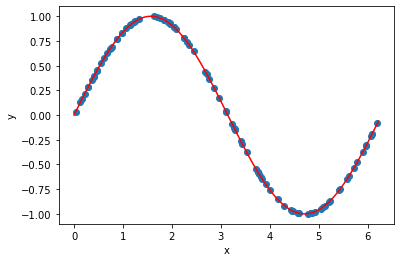

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = 2 * np.pi * np.random.random((100,1))
y = np.sin(x)

plt.plot(x, y,'o')
plt.xlabel('x')
plt.ylabel('y')

x_all = np.arange(0,2*np.pi, 2*np.pi/100).reshape(-1,1)
plt.plot(x_all, np.sin(x_all), 'r')

In [50]:
writer.add_scalar?

Signature: writer.add_scalar(tag, scalar_value, global_step=None, walltime=None)
Docstring:
Add scalar data to summary.

Args:
    tag (string): Data identifier
    scalar_value (float or string/blobname): Value to save
    global_step (int): Global step value to record
    walltime (float): Optional override default walltime (time.time())
      with seconds after epoch of event

Examples::

    from torch.utils.tensorboard import SummaryWriter
    writer = SummaryWriter()
    x = range(100)
    for i in x:
        writer.add_scalar('y=2x', i * 2, i)
    writer.close()

Expected result:

.. image:: _static/img/tensorboard/add_scalar.png
   :scale: 50 %
File:      /opt/conda/lib/python3.6/site-packages/torch/utils/tensorboard/writer.py
Type:      method


In [14]:
x = torch.arange(-5, 5, 0.1).view(-1, 1)
x_ = torch.arange(-4,4,0.2).view(-1,1)
y = -5 * x + 0.1 * torch.randn(x.size())
y_ = -4*x_ + 0.1 * torch.randn(x_.size())
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

def train_model(iter):
    for epoch in range(iter):
        model.train()
        y1 = model(x)
        loss = criterion(y1, y)
        writer.add_scalar("Loss/train", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model.eval()
        y2 = model(x_)
        loss = criterion(y2,y_)
        writer.add_scalar("Loss/val",loss,epoch)


        
train_model(20)
writer.flush()
writer.close()

In [46]:
import torch.nn as nn
import torch.nn.functional as F

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1,100)
        self.fc2 = nn.Linear(100,50)
        self.fc3 = nn.Linear(50,1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = MyNet()
print(model)

MyNet(
  (fc1): Linear(in_features=1, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=1, bias=True)
)


In [47]:
from torch.utils.tensorboard import SummaryWriter

# reset 
!rm -rf runs/
model = MyNet()

# Set Hyperparameters, loss function, and optimizer
lr = 1e-1
n_epochs = 4000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

writer = SummaryWriter()
# Training Loop
for epoch in range(n_epochs):
  
    y_pred = model(x_tensor)
    loss = loss_fn(y_tensor, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
    if (epoch%100 == 0):
        writer.add_histogram('fc1/weights', model.fc1.weight.data, epoch)
        writer.add_histogram('fc1/biases', model.fc1.bias.data, epoch)
        writer.add_histogram('fc2/weights', model.fc2.weight.data, epoch)
        writer.add_histogram('fc2/biases', model.fc2.bias.data, epoch)
        writer.add_histogram('fc3/weights', model.fc3.weight.data, epoch)
        writer.add_histogram('fc3/biases', model.fc3.bias.data, epoch)

writer.close()

In [82]:
x = torch.randn(5, requires_grad=True)
y = x.pow(2)
y.grad_fn

In [9]:
!tensorboard dev upload --logdir runs \
--name "My latest2 experiment" \
--description "Simple comparison of several hyperparameters"

TensorFlow installation not found - running with reduced feature set.
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/ybEoZ6J3QS67rvz3YeID1w/

[2022-02-28T18:31:46] Started scanning logdir.
[2022-02-28T18:31:47] Total uploaded: 20 scalars, 0 tensors, 0 binary objects
^C2KListening for new data in logdir...


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/ybEoZ6J3QS67rvz3YeID1w/


In [57]:
x = "awesome"

def myfunc():
    global x
    x = "fantastic"

myfunc()

print("Python is " + x)


Python is fantastic


In [67]:
def A(step):
    step+=1
    return step
    

In [76]:
global step 
step=0
def B():
#     print(step)
    step=step+1
#     return step
B()
print(step)

UnboundLocalError: local variable 'step' referenced before assignment

In [19]:
%tensorboard --logdir=runs